In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.cluster import KMeans
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### K-means Clustering

Load dataset.

In [3]:
data=loadmat("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex7data2.mat")

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
x=data['X']
x.shape

(300, 2)

Let's visualize data.

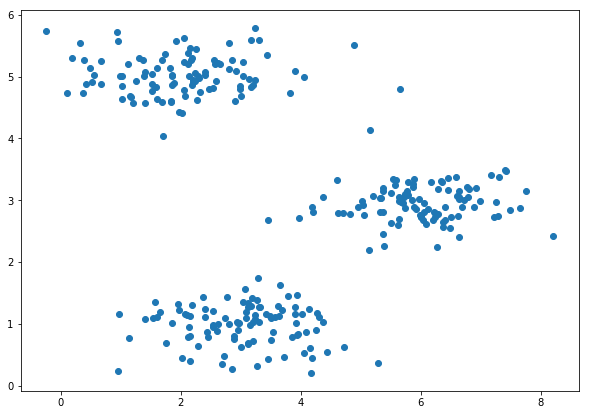

In [28]:
plt.figure(figsize=[10,7])
plt.scatter(x[:,0], x[:,1])

Assign clusters to Kmeans model.

In [25]:
kmean= KMeans(3)
kmean.fit(x)
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
kmean.cluster_centers_, kmean.labels_

(array([[3.04367119, 1.01541041],
        [6.03366736, 3.00052511],
        [1.95399466, 5.02557006]]),
 array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        

Let's visualize clusters.

Text(0.5,1,'K-Means Clustering Results with K=3')

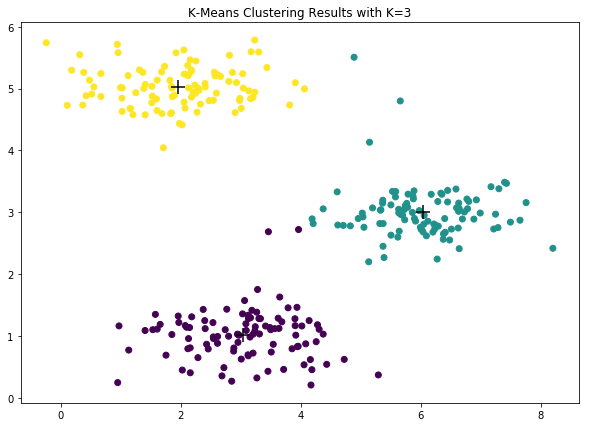

In [46]:
plt.figure(figsize=[10,7])
plt.scatter(x[:,0], x[:,1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], marker='+', s=200, color='black')
plt.title('K-Means Clustering Results with K=3')

#### Image compression with K-means

In [131]:
img= plt.imread("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/bird_small.png")
img.shape

(128, 128, 3)

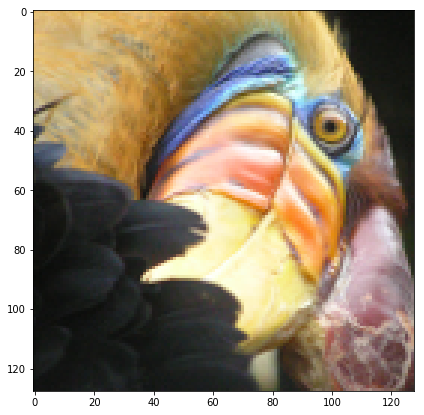

In [124]:
plt.figure(figsize=[10,7])
plt.imshow(img)

In [141]:
im= (img/255)
image=im.reshape(128*128,3)
image.shape

(16384, 3)

In [142]:
bird= KMeans(16)
bird.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
bird_=bird.cluster_centers_[bird.labels_].reshape(128, 128, 3)

Text(0.5,1,'Compressed, with 16 colors')

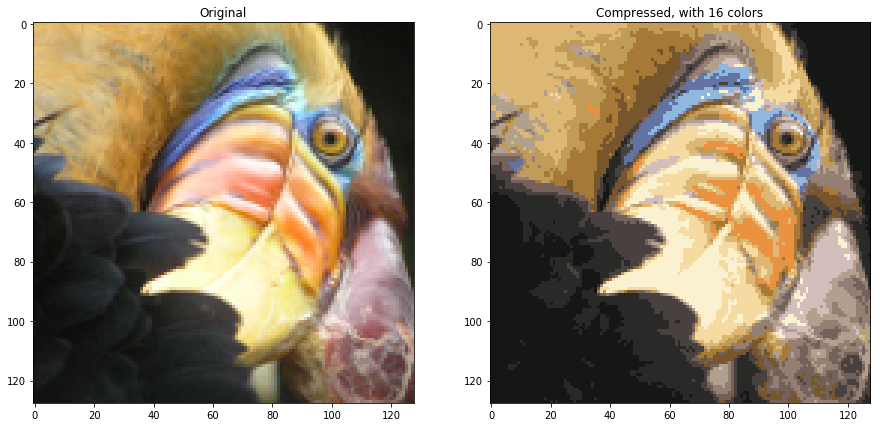

In [144]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=[15,10])
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(bird_*255)
ax2.set_title('Compressed, with 16 colors')

Original and reconstructed image (when using K-means to compress the image).